 #  <b>Static data

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="white")

<h1> 1.1.1. Manipulation de dataset

<h3>a- importer et visualiser le contenu d'un dataset

In [115]:
from utils import load_data
data = load_data('./Data/Dataset1.csv')

In [116]:
data.iloc[0,0] 
data.head(10)

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,138,8.6,560,7.46,0.62,0.70,5.90,0.24,0.31,0.77,8.71,0.11,1.2040,0
1,213,7.5,338,7.62,0.75,1.06,25.40,0.30,0.86,1.54,2.89,2.29,1.8232,0
2,163,9.6,718,7.59,0.51,1.11,14.30,0.30,0.86,1.57,2.70,2.03,1.9092,0
3,157,6.8,475,7.64,0.58,0.94,26.00,0.34,0.54,1.53,2.65,1.82,1.6168,0
4,270,9.9,444,7.63,0.40,0.86,11.80,0.25,0.76,1.69,2.43,2.26,1.4792,1
5,220,8.6,444,7.43,0.65,0.72,11.70,0.37,0.66,0.90,2.19,1.82,1.2384,0
6,220,7.2,222,7.62,0.43,0.81,7.40,0.34,0.69,1.05,2.00,1.88,1.3932,0
7,207,7,401,7.63,0.59,0.69,7.60,0.32,0.68,0.62,2.43,1.68,1.1868,0
8,333,14.9,422,8.26,0.48,NaN,8.45,0.51,3.32,1.08,9.21,0.32,2.0124,2
9,289,8.6,560,7.58,0.44,0.67,7.30,0.63,0.66,0.94,2.43,1.79,1.1524,1


<h2>b-Fournir une description de chaque attribut

In [117]:
from utils import print_info
print_info(data)

{'Number of rows': 885,
 'Number of colonns': 14,
 'Memory size': '96.796875 ko',
 'Data type': ['int64', 'object', 'float64']}

<h2>c- fournir une description de chaque attribut

In [118]:
from utils import describe_column
colonnes_description = describe_column(data)
pd.DataFrame(colonnes_description, columns = ["Name","Non-null value","Type"])

,Name,Non-null value,Type
0,N,885,int64
1,P,885,object
2,K,885,int64
3,pH,885,float64
4,EC,885,float64
5,OC,884,float64
6,S,885,float64
7,Zn,885,float64
8,Fe,885,float64
9,Cu,884,float64


In [119]:
def missing_values_info(data):
    missing_values_count = data.isnull().sum()
    missing_percentage = (missing_values_count / len(data)) * 100
    
    missing_info_df = pd.DataFrame({
        'Column': missing_values_count.index,
        'Missing_Values_Count': missing_values_count.values,
        'Missing_Values_Percentage': missing_percentage.values
    })

    return missing_info_df
missing_values_info(data)

,Column,Missing_Values_Count,Missing_Values_Percentage
0,N,0,0.000000
1,P,0,0.000000
2,K,0,0.000000
3,pH,0,0.000000
4,EC,0,0.000000
5,OC,1,0.112994
6,S,0,0.000000
7,Zn,0,0.000000
8,Fe,0,0.000000
9,Cu,1,0.112994


<h1>1.1.2.Analyse des caractéristiques des attributs du dataset :

<h2>

<h2>a-Les mesures de tendance centrale 

In [120]:
from utils import central_trend,symetrie, quartile, missing_value
attributes = data.columns
central_trend_dict = {}

for attribute in attributes:
    ct_result = central_trend(data, attribute)
    
    
    # Create a dictionary for the current attribute's central trend
    tc = {
        'Median': ct_result['median'],
        'Mean': ct_result['mean'],
        'Modes': ct_result['modes'],
        
    }
    
    # Add additional measures 
    #quartile_result = quartile(data[attribute])
    #tc['First Quartile'] = quartile_result[1]
    #tc['Third Quartile'] = quartile_result[3]
    
    tc['symetrie'] = symetrie(tc)
    
    #missing, result = missing_value(data[attribute])
    # tc['Missing Values'] = missing

    central_trend_dict[attribute] = tc

# Create a DataFrame from the dictionary
pd.DataFrame.from_dict(central_trend_dict, orient='index')



,Median,Mean,Modes,symetrie
N,257.0000,246.997740,[207],Distribution non identifie
P,8.1000,14.555266,[8.3],Distribution non identifie
K,475.0000,501.338983,[444],Distribution d'asymetrie positive
pH,7.5000,7.511955,[7.5],Distribution symetrique
EC,0.5500,0.543921,"[0.53, 0.62]",Distribution symetrique
OC,0.5900,0.617817,[0.88],Distribution symetrique
S,6.6400,7.545808,"[4.22, 5.13]",Distribution d'asymetrie positive
Zn,0.3600,0.468723,[0.28],Distribution symetrique
Fe,3.5600,4.126757,[6.32],Distribution non identifie
Cu,0.9300,0.952002,[1.25],Distribution symetrique


<h2>b-Construction des boîtes à moustache et affichage des données aberrantes

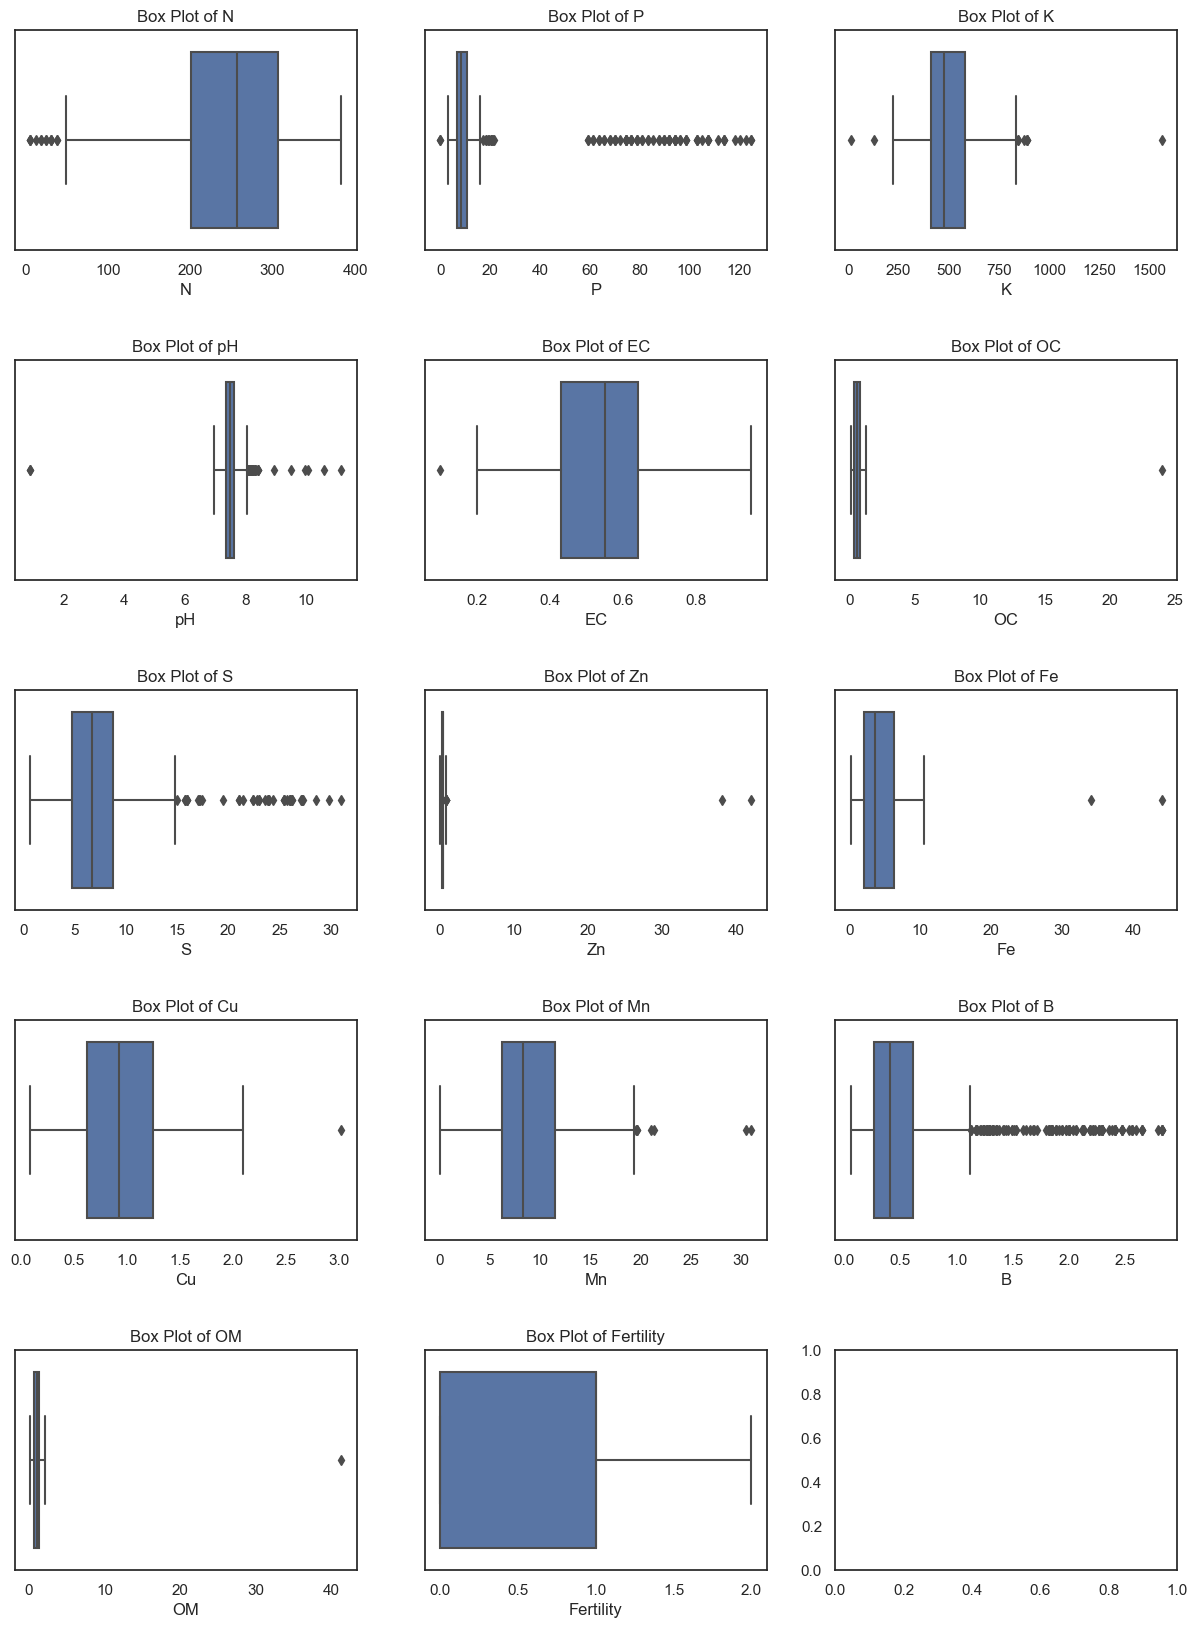

In [121]:
from utils import box_plot_sns
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt

# Replace all '?' values with 0 in column 'P'
data['P'] = data['P'].replace('?', 0)

# Convert the column to numeric values
data['P'] = pd.to_numeric(data['P'], errors='coerce')

fig, axes = plt.subplots(5, 3, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing

for i, attribute in enumerate(attributes):
    row, col = divmod(i, 3)
    box_plot_sns(data, attribute, axes[row, col])

plt.show()

<h2>c-Construction des histogrammes 

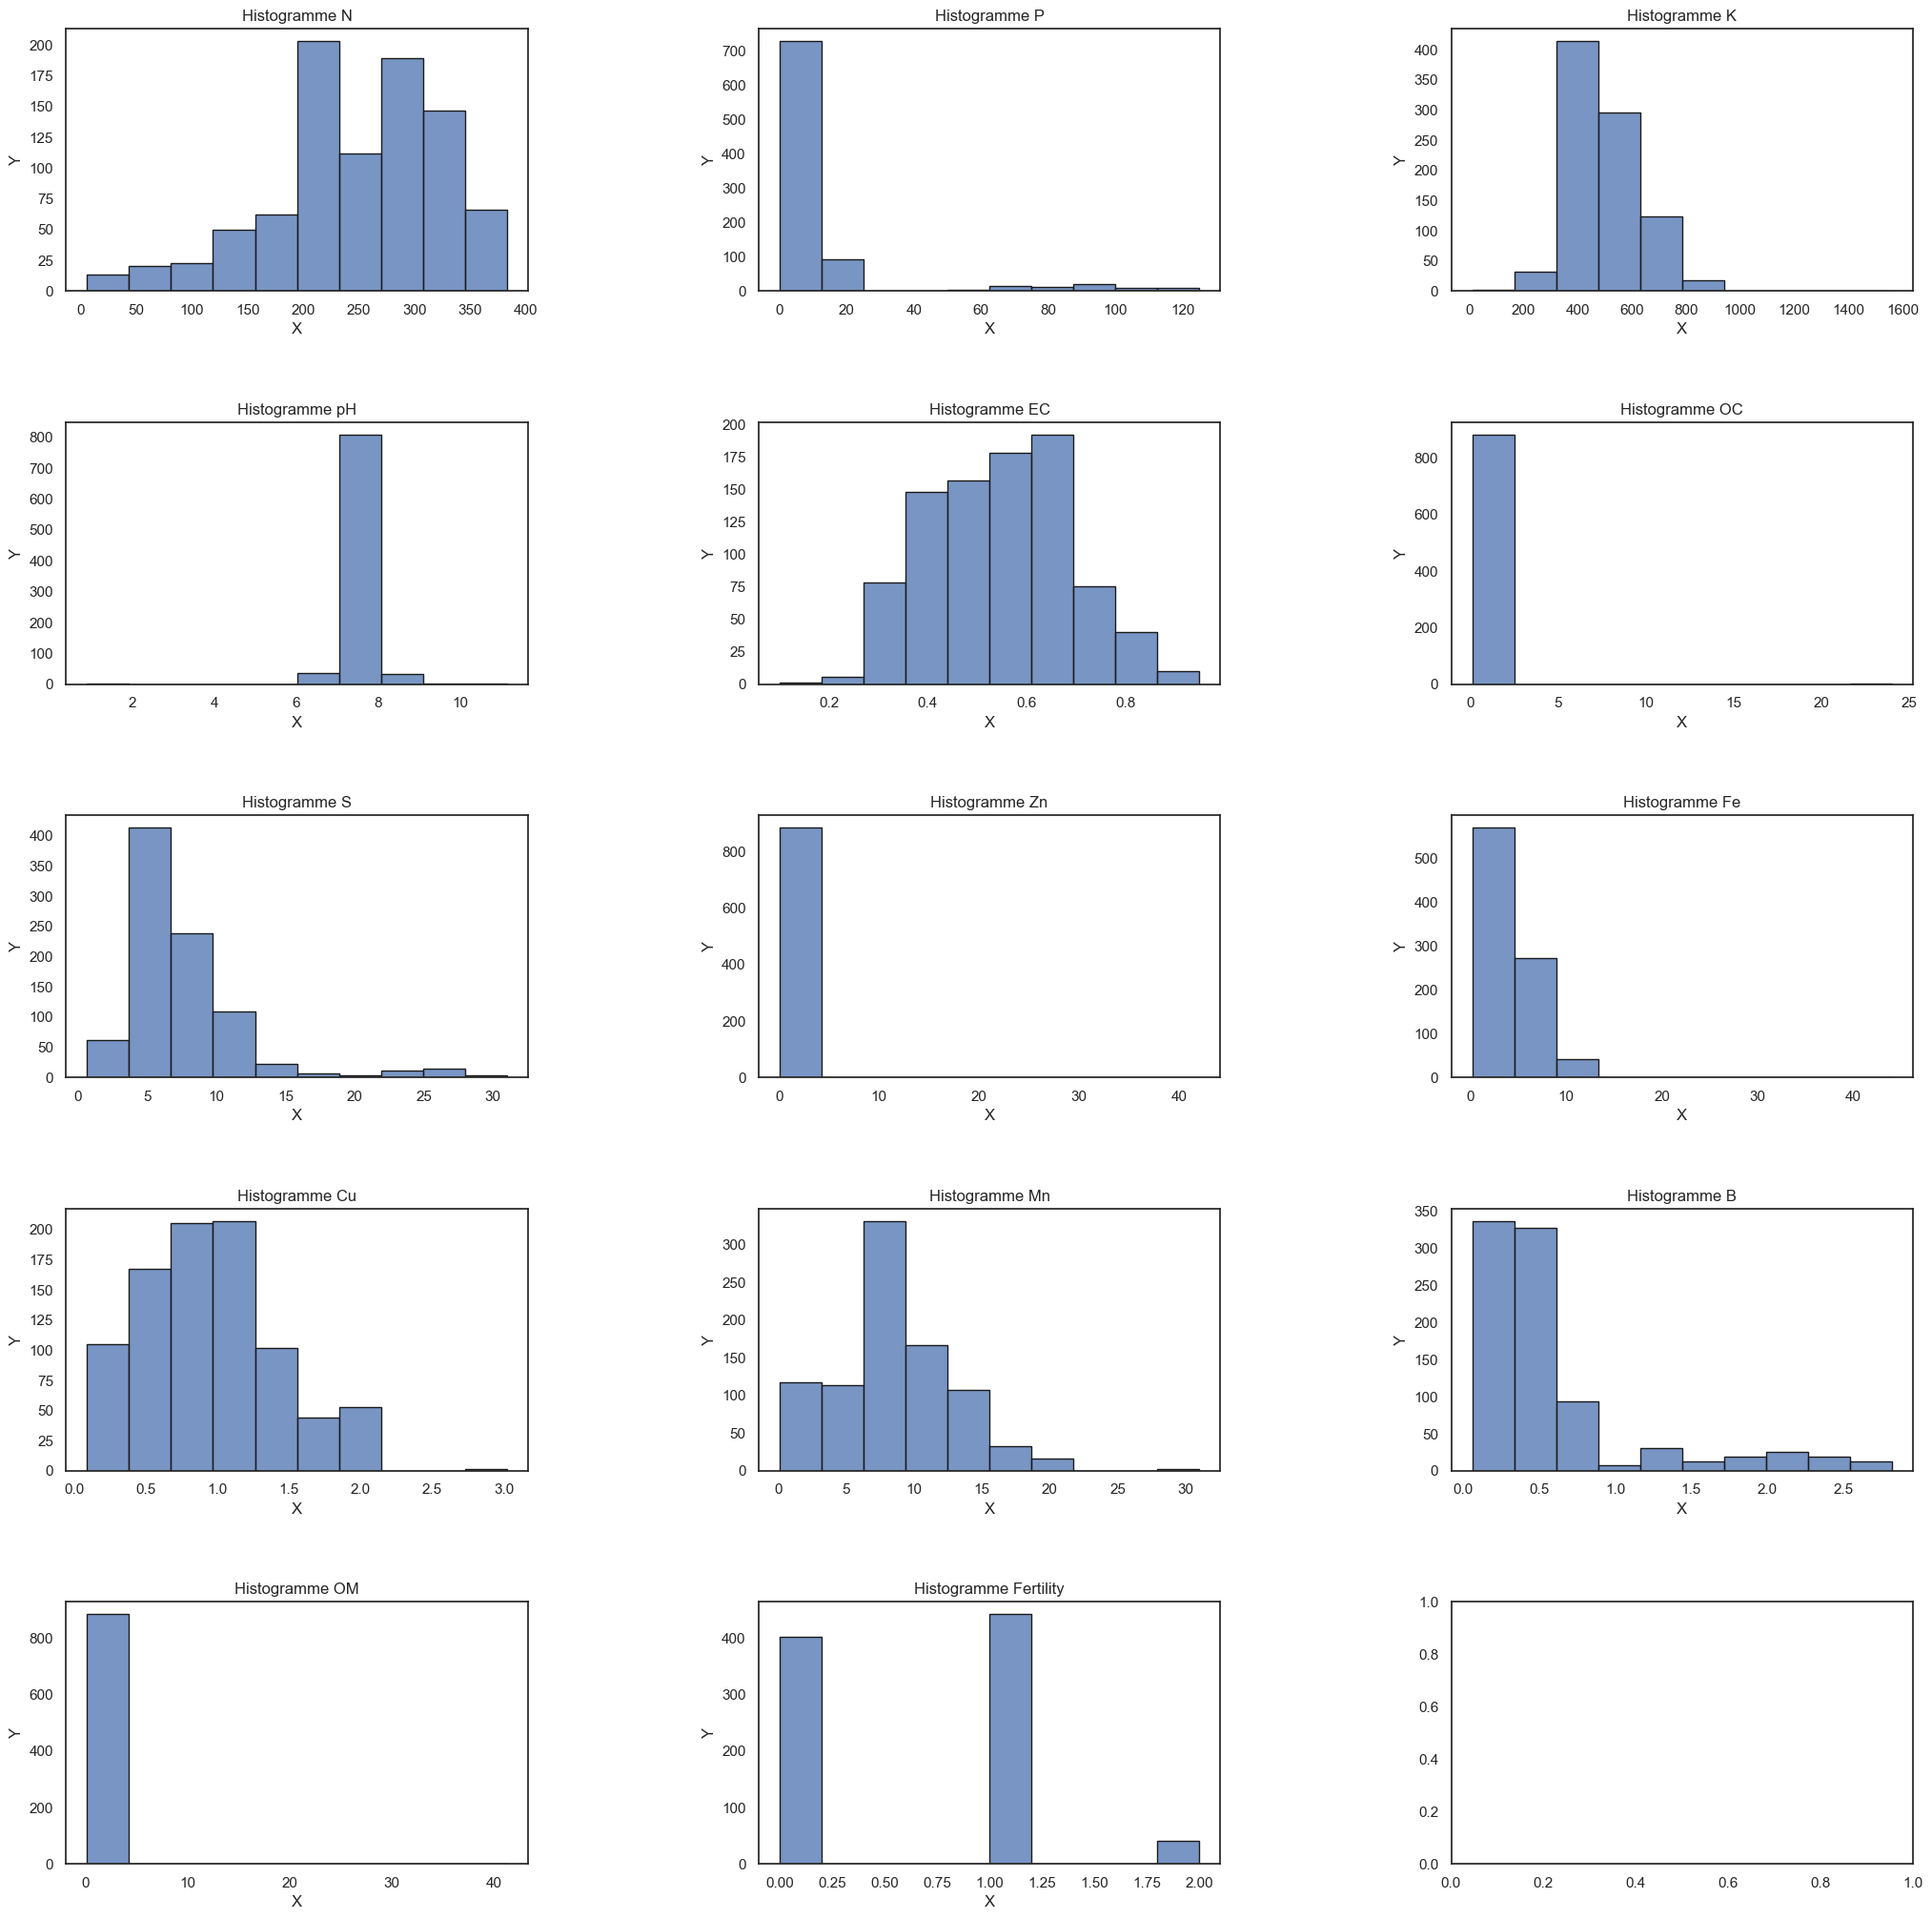

In [122]:
from utils import histogramme_sns

fig, axes = plt.subplots(5, 3, figsize=(25, 25))
fig.subplots_adjust(hspace=0.5, wspace=0.5) # Adjust vertical spacing

for i, attribute in enumerate(attributes):
    row, col = divmod(i, 3)
    histogramme_sns(data, attribute, axes[row, col])

plt.show()

<h2>d-Diagrammes de dispersion des données 

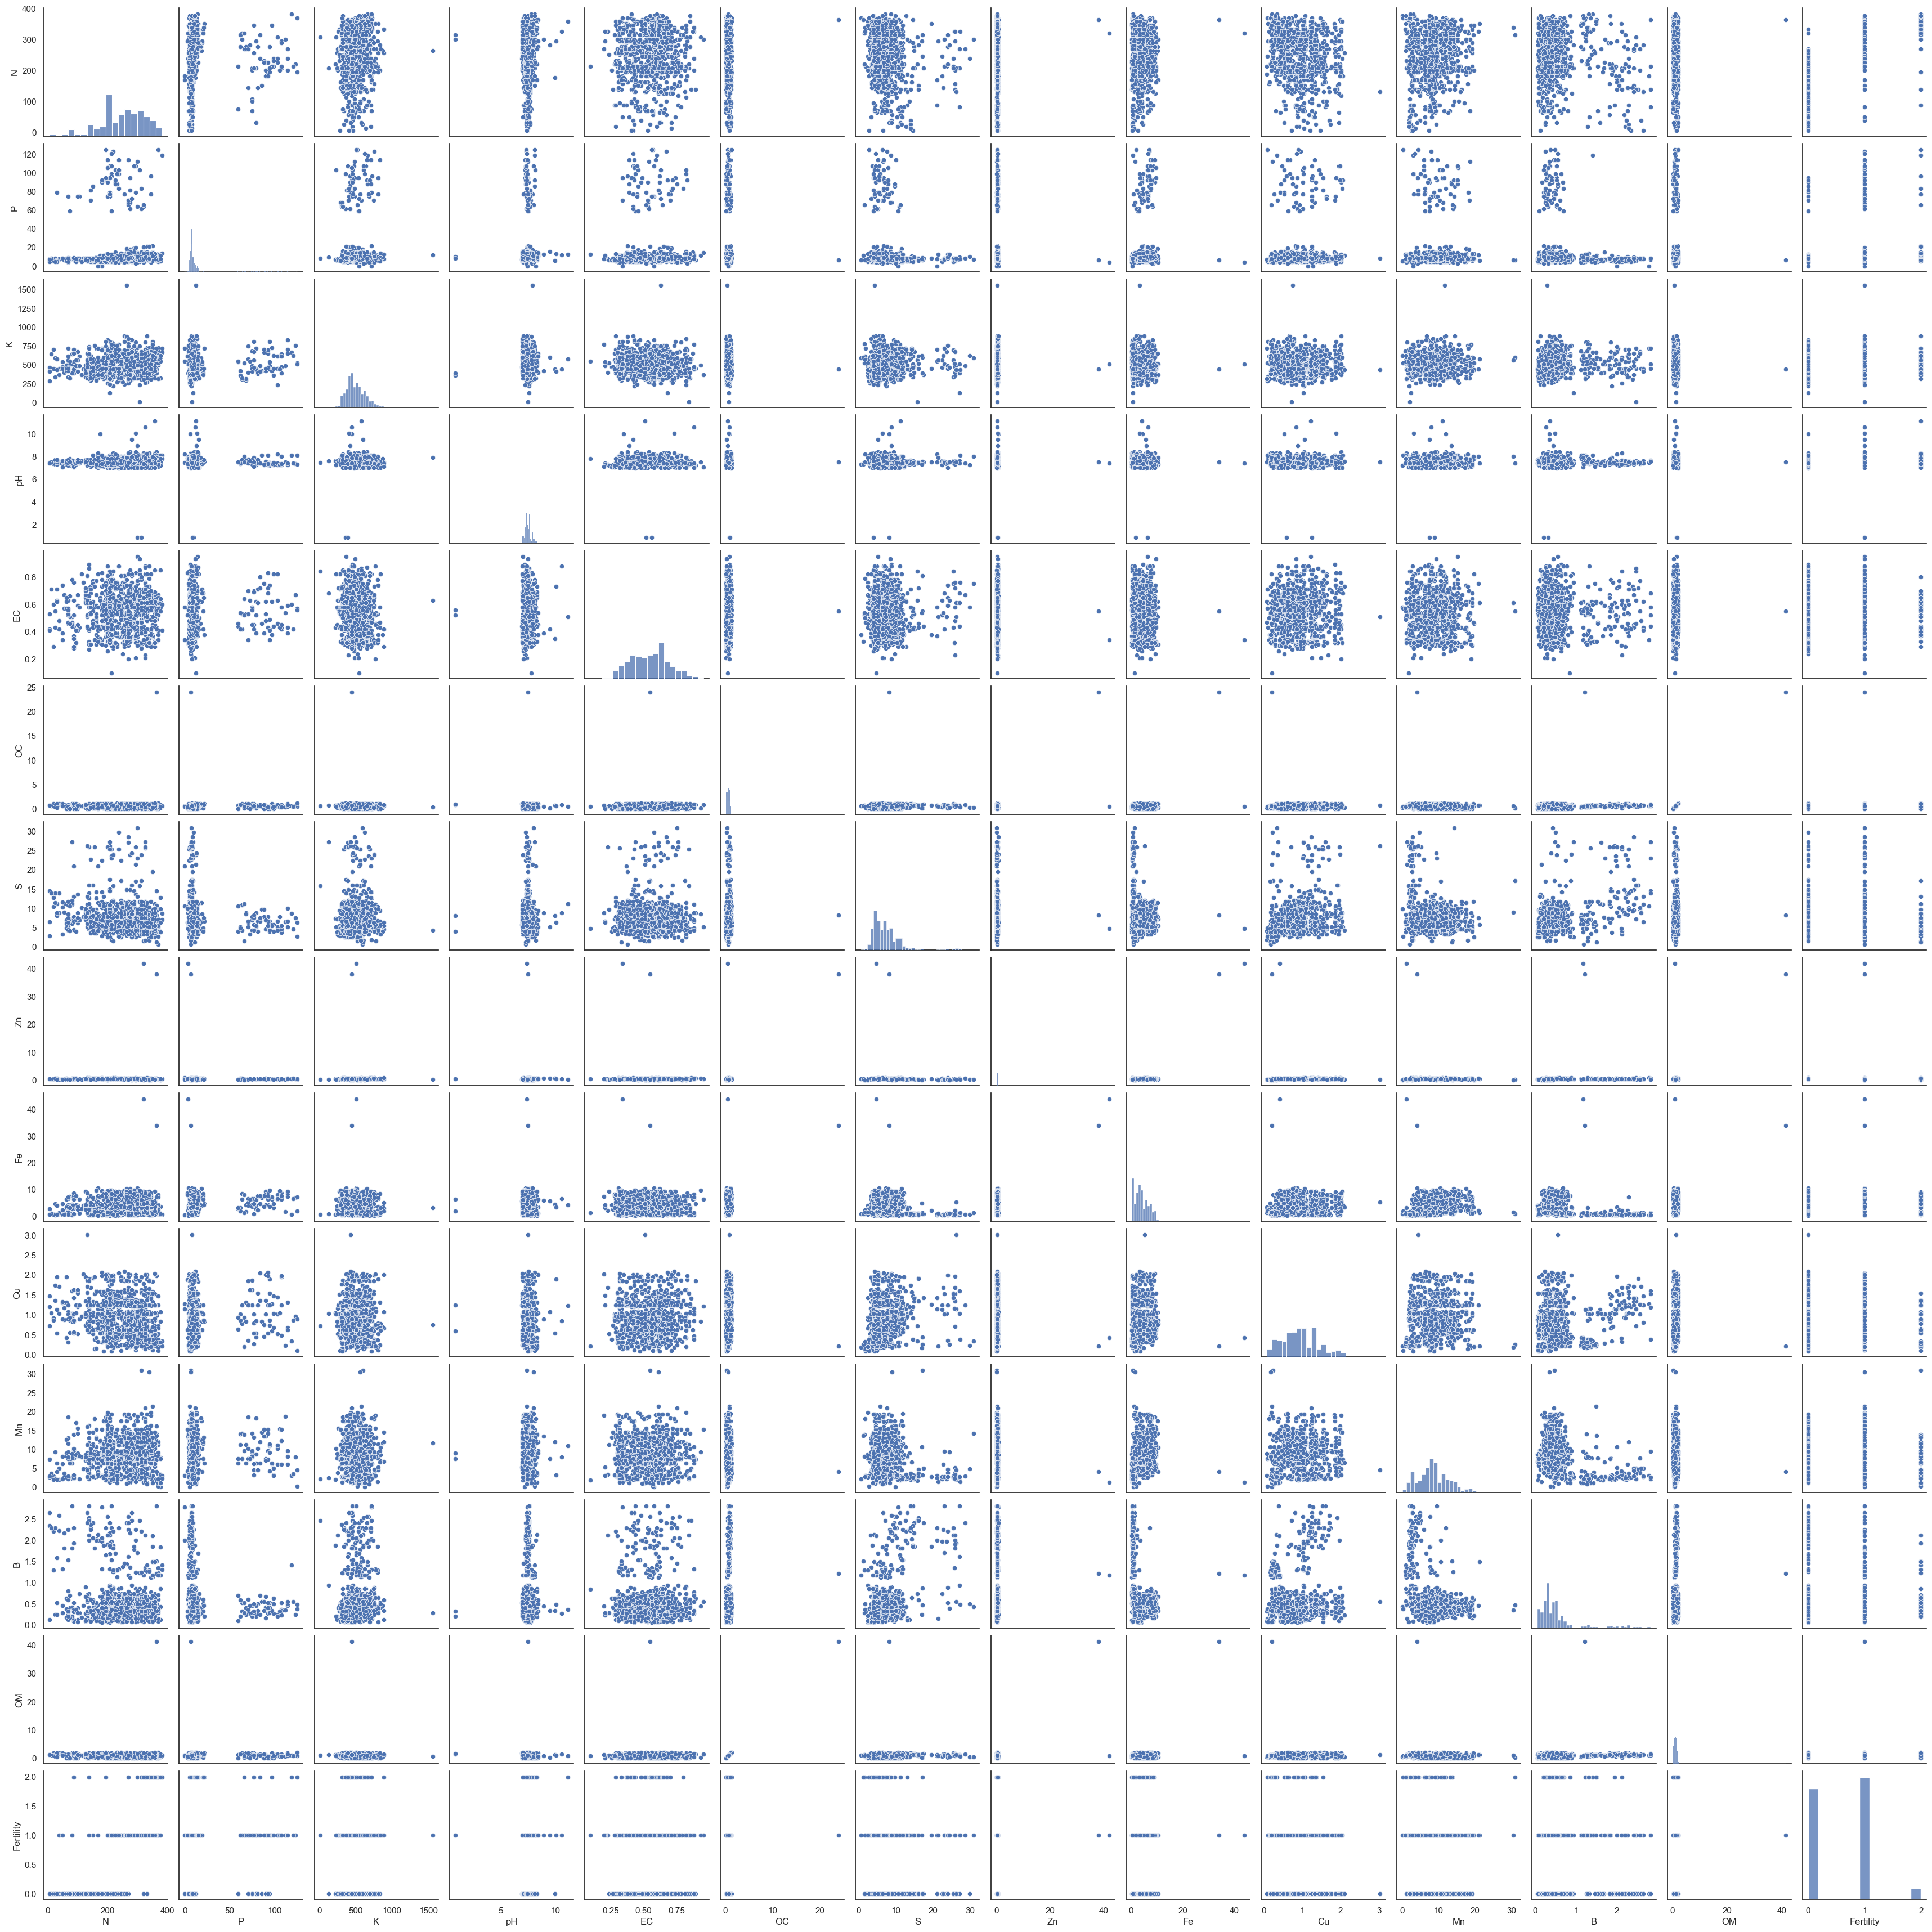

In [123]:
import seaborn as sns
sns.pairplot(data)
plt.show()

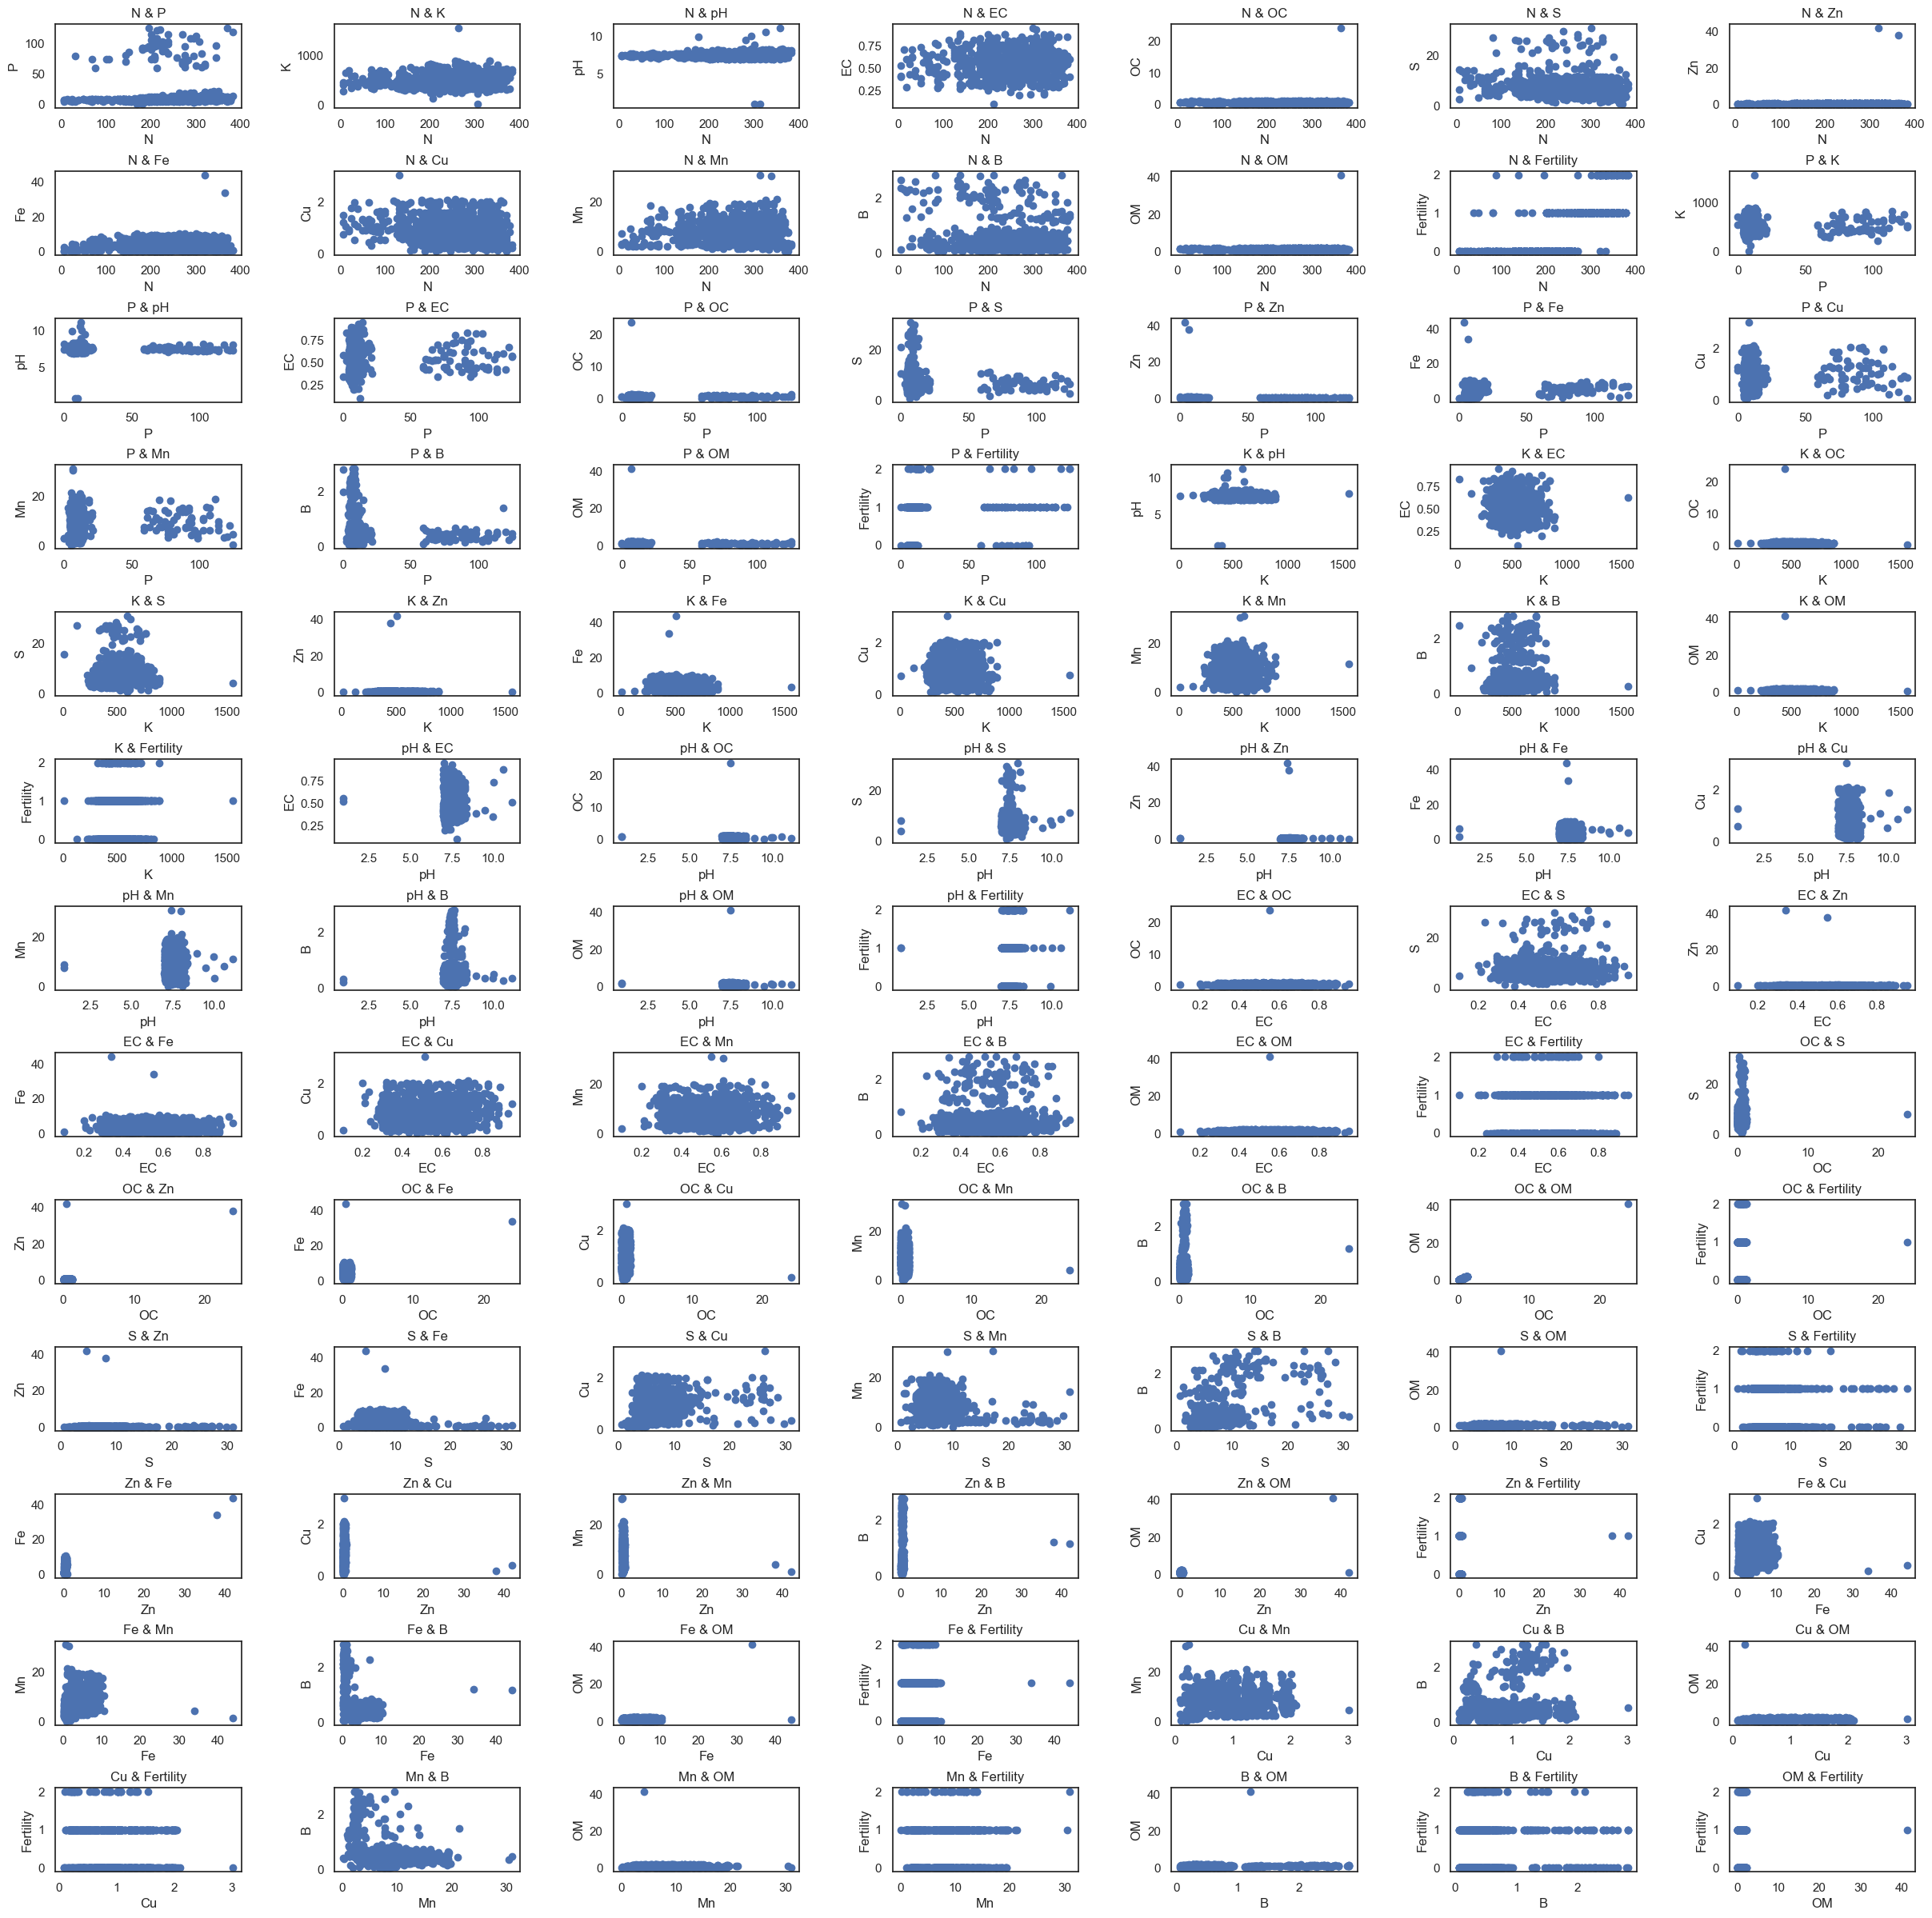

In [124]:
import itertools


fig, axes = plt.subplots(13, 7, figsize=(30, 30))  # 7x7 grid for 14 attributes
fig.subplots_adjust(hspace=0.75, wspace=0.5) # Adjust vertical spacing

combinations = list(itertools.combinations(data.columns, 2))  # Generate all combinations of 2 columns

k = 0
j = 0

for combination in combinations:
    axes[k, j].scatter(data[combination[0]], data[combination[1]])
    axes[k, j].set_xlabel(combination[0])
    axes[k, j].set_ylabel(combination[1])
    axes[k, j].set_title(f"{combination[0]} & {combination[1]}")

    j += 1
    if j == 7:
        j = 0
        k += 1

plt.show()

In [125]:
correlation_matrix = data.corr()
correlation_matrix

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
N,1.000000,-0.009490,0.052113,0.078242,-0.005028,0.029562,-0.126181,0.054002,0.073395,-0.185161,0.102782,-0.168323,0.030360,0.708594
P,-0.009490,1.000000,0.080967,0.004154,0.006203,-0.008999,-0.101850,-0.016851,0.142803,0.054183,0.047009,-0.101064,-0.008984,0.210788
K,0.052113,0.080967,1.000000,0.009780,-0.098793,-0.030426,0.017687,-0.003273,-0.055885,-0.010315,0.025181,0.102148,-0.030868,0.065766
pH,0.078242,0.004154,0.009780,1.000000,0.058119,-0.016271,0.011906,-0.008345,-0.033637,-0.001358,-0.008453,0.008019,-0.015047,0.088682
EC,-0.005028,0.006203,-0.098793,0.058119,1.000000,-0.007191,0.051240,-0.035822,-0.043280,0.033859,-0.045700,-0.002210,-0.007524,-0.024835
OC,0.029562,-0.008999,-0.030426,-0.016271,-0.007191,1.000000,0.047234,0.625654,0.281461,-0.009366,-0.078526,0.106384,1.000000,0.034687
S,-0.126181,-0.101850,0.017687,0.011906,0.051240,0.047234,1.000000,-0.013855,-0.208789,0.159686,-0.225795,0.477218,0.047374,-0.064136
Zn,0.054002,-0.016851,-0.003273,-0.008345,-0.035822,0.625654,-0.013855,1.000000,0.547544,-0.051125,-0.064775,0.055199,0.625518,0.031672
Fe,0.073395,0.142803,-0.055885,-0.033637,-0.043280,0.281461,-0.208789,0.547544,1.000000,0.138706,0.278029,-0.335766,0.281189,0.033740
Cu,-0.185161,0.054183,-0.010315,-0.001358,0.033859,-0.009366,0.159686,-0.051125,0.138706,1.000000,0.081876,0.101602,-0.009159,-0.138448


<h1>1.1.3. Prétraitement

<h2>1. Traitement des valeurs manquantes et aberrantes 

<h3>Remplacement des valeurs manquantes

In [126]:
#Showing variables with missing values
data[data.columns[data.isnull().any()]].isnull().sum()

OC    1
Cu    1
dtype: int64

Comme nous venons de constater qu'il n'y a pas beaucoup de valeurs manquantes, le choix de la technique de remplacement n'aura pas un impact considérable sur les résultats.

In [127]:
data_sub = data.copy()
ct_result = central_trend(data, "OC")

In [128]:
# Mode imputation
# The two attributes have a symetric distribution so we can aply this methode
modes = ct_result["modes"]
for mode_value in modes:
    data_sub['OC'].replace(np.nan, mode_value, inplace=True)

# Vérifier les valeurs manquantes après l'imputation
data_sub[data_sub.columns[data_sub.isnull().any()]].isnull().sum()

Cu    1
dtype: int64

In [129]:
# Mean imputation
data_sub['Cu'].replace(np.nan, ct_result["mean"], inplace=True)
data_sub[data_sub.columns[data_sub.isnull().any()]].isnull().sum()

Series([], dtype: float64)

In [130]:
data_sub1 = data.copy()

In [131]:
# Median imputation
data_sub1['Cu'].replace(np.nan, ct_result["median"], inplace=True)
data_sub1[data_sub.columns[data_sub1.isnull().any()]].isnull().sum()

OC    1
dtype: int64

In [132]:
# Interpolation imputation
data_sub1['OC'].interpolate(inplace=True)
data_sub1[data_sub.columns[data_sub1.isnull().any()]].isnull().sum()

Series([], dtype: float64)

In [133]:
data_sub2 = data.copy()
data_sub2[data_sub.columns[data_sub2.isnull().any()]].isnull().sum()

OC    1
Cu    1
dtype: int64

In [134]:
# Droping the tuple that containe missing value
data_sub2.dropna(axis=0, inplace=True)
data_sub2[data_sub.columns[data_sub2.isnull().any()]].isnull().sum()

Series([], dtype: float64)

In [135]:
data = data_sub2

<h3>Taitement des valeurs aberrantes

In [136]:
# Find the outliers
from utils import find_outliers_iqr
attributes = data.columns
outliers_dict = {}

for attribute in attributes:
    outliers_result = find_outliers_iqr(data[attribute])
    # fix the index problem
    valid_indices = [idx for idx in outliers_result if 0 <= idx < len(data[attribute])]
    OD = {
        'Outliers indices': valid_indices,
        'Outliers values': data[attribute].iloc[valid_indices].tolist(),
        'Outliers number': len(valid_indices)
    }

    outliers_dict[attribute] = OD

# Create a DataFrame from the dictionary
pd.DataFrame.from_dict(outliers_dict, orient='index')


,Outliers indices,Outliers values,Outliers number
N,"[52, 54, 57, 58, 72, 75, 81, 88, 91, 149, 244,...","[88, 56, 25, 82, 69, 132, 56, 314, 270, 63, 25...",13
P,"[16, 34, 243, 279, 491, 492, 493, 494, 495, 49...","[7.5, 5.0, 7.2, 7.0, 20.4, 19.3, 18.2, 19.5, 2...",79
K,"[23, 24, 291, 335, 743, 750, 801, 858, 865]","[11, 496, 634, 644, 750, 560, 760, 750, 560]",9
pH,"[34, 328, 339, 356, 520, 522, 526, 529, 530, 5...","[7.62, 7.4, 7.4, 7.0, 7.57, 7.8, 7.3, 8.95, 9....",40
EC,[713],[0.38],1
OC,[668],[0.57],1
S,"[1, 3, 22, 23, 24, 25, 26, 28, 30, 32, 33, 34,...","[25.4, 26.0, 27.2, 15.8, 26.2, 26.0, 14.6, 8.2...",43
Zn,"[16, 36, 41, 66, 255, 540, 660, 668]","[0.46, 0.37, 0.59, 0.46, 0.53, 0.52, 0.4, 0.37]",8
Fe,"[660, 668]","[0.41, 0.98]",2
Cu,[151],[0.75],1


In [137]:
from utils import find_outliers_zscore
attributes = data.columns
outliers_dict_1 = {}

for attribute in attributes:
    outliers_result_1 = find_outliers_zscore(data[attribute], 3)
    # fix the index problem
    valid_indices = [idx for idx in outliers_result_1 if 0 <= idx < len(data[attribute])]
    OD = {
        'Outliers indices': valid_indices,
        'Outliers values': data[attribute].iloc[valid_indices].tolist(),
        'Outliers number': len(valid_indices)
    }

    outliers_dict_1[attribute] = OD

# Create a DataFrame from the dictionary
pd.DataFrame.from_dict(outliers_dict_1, orient='index')


,Outliers indices,Outliers values,Outliers number
N,"[81, 88, 91, 244]","[56, 314, 270, 257]",4
P,"[598, 606, 616, 617, 619, 688, 693, 704, 795, ...","[78.9, 68.0, 98.7, 74.6, 70.2, 7.9, 6.8, 7.0, ...",41
K,"[24, 801]","[496, 760]",2
pH,"[356, 520, 522, 530, 531, 532, 533, 534]","[7.0, 7.57, 7.8, 9.5, 10.05, 10.6, 11.15, 7.49]",8
EC,[713],[0.38],1
OC,[668],[0.57],1
S,"[1, 3, 22, 23, 25, 26, 32, 33, 34, 35, 36, 37,...","[25.4, 26.0, 27.2, 15.8, 26.0, 14.6, 22.4, 21....",32
Zn,"[660, 668]","[0.4, 0.37]",2
Fe,"[660, 668]","[0.41, 0.98]",2
Cu,[151],[0.75],1


**Winsorizing :**

Remplacer les valeurs aberrantes par les valeurs minimales ou maximales non aberrantes de l'ensemble de données. Cela implique de fixer un seuil au-delà duquel les valeurs sont considérées comme aberrantes.

In [138]:
from utils import winsorize
df_after = data.copy()
for attribute in attributes:
    df_after[attribute] = winsorize(data[attribute])
    

In [139]:
outliers_dict = {}

for attribute in attributes:
    outliers_result = find_outliers_iqr(df_after[attribute])
    # fix the index problem
    valid_indices = [idx for idx in outliers_result if 0 <= idx < len(df_after[attribute])]
    OD = {
        'Outliers indices': valid_indices,
        'Outliers values': df_after[attribute].iloc[valid_indices].tolist(),
        'Outliers number': len(valid_indices)
    }

    outliers_dict[attribute] = OD

# Create a DataFrame from the dictionary
pd.DataFrame.from_dict(outliers_dict, orient='index')

,Outliers indices,Outliers values,Outliers number
N,[],[],0
P,[],[],0
K,[],[],0
pH,[],[],0
EC,[],[],0
OC,[],[],0
S,[],[],0
Zn,[],[],0
Fe,[],[],0
Cu,[],[],0


In [140]:
df_after.head(10)

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,138,8.6,560.0,7.46,0.62,0.70,5.900,0.24,0.31,0.77,8.71,0.11,1.2040,0
1,213,7.5,338.0,7.62,0.75,1.06,14.825,0.30,0.86,1.54,2.89,1.12,1.8232,0
2,163,9.6,718.0,7.59,0.51,1.11,14.300,0.30,0.86,1.57,2.70,1.12,1.9092,0
3,157,6.8,475.0,7.64,0.58,0.94,14.825,0.34,0.54,1.53,2.65,1.12,1.6168,0
4,270,9.9,444.0,7.63,0.40,0.86,11.800,0.25,0.76,1.69,2.43,1.12,1.4792,1
5,220,8.6,444.0,7.43,0.65,0.72,11.700,0.37,0.66,0.90,2.19,1.12,1.2384,0
6,220,7.2,222.0,7.62,0.43,0.81,7.400,0.34,0.69,1.05,2.00,1.12,1.3932,0
7,207,7.0,401.0,7.63,0.59,0.69,7.600,0.32,0.68,0.62,2.43,1.12,1.1868,0
9,289,8.6,560.0,7.58,0.44,0.67,7.300,0.63,0.66,0.94,2.43,1.12,1.1524,1
10,138,8.1,739.0,7.55,0.33,0.78,9.000,0.69,0.41,1.15,2.75,1.12,1.3416,0


<h2>2. Réduction des données

L'élimination verticale n'est pas nécessaire, car comme nous l'avons constaté, il n'y a pas de duplicata dans les colonnes.

In [141]:
# Drop duplicate rows in-place
df_after.drop_duplicates(inplace=True)

In [142]:
colonnes_description = describe_column(df_after)
pd.DataFrame(colonnes_description, columns = ["Name","Non-null value","Type"])

,Name,Non-null value,Type
0,N,880,int64
1,P,880,float64
2,K,880,float64
3,pH,880,float64
4,EC,880,float64
5,OC,880,float64
6,S,880,float64
7,Zn,880,float64
8,Fe,880,float64
9,Cu,880,float64


<h2>3. Normalisation des données

<h3>a-Méthode Min-Max

In [143]:
from utils import min_max_normalize
df_norm_min_max = min_max_normalize(df_after)
df_norm_min_max


,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,0.281525,0.496622,0.593935,0.473214,0.604790,0.468750,0.370814,0.248175,0.007994,0.325359,0.449673,0.047170,0.468750,0.0
1,0.501466,0.422297,0.265533,0.616071,0.760479,0.750000,1.000000,0.335766,0.051958,0.693780,0.145359,1.000000,0.750000,0.0
2,0.354839,0.564189,0.827663,0.589286,0.473054,0.789062,0.962989,0.335766,0.051958,0.708134,0.135425,1.000000,0.789063,0.0
3,0.337243,0.375000,0.468195,0.633929,0.556886,0.656250,1.000000,0.394161,0.026379,0.688995,0.132810,1.000000,0.656250,0.0
4,0.668622,0.584459,0.422337,0.625000,0.341317,0.593750,0.786747,0.262774,0.043965,0.765550,0.121307,1.000000,0.593750,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,0.906158,0.638514,0.687130,0.919643,0.473054,0.148437,0.465280,0.423358,0.358114,0.287081,0.570980,0.594340,0.148438,0.5
879,0.651026,0.523649,0.484467,0.276786,0.425150,0.000000,0.231230,0.408759,0.643485,0.172249,0.411503,0.320755,0.000000,0.5
880,0.686217,0.537162,0.312870,0.616071,0.604790,0.304688,0.422982,0.510949,0.268585,0.258373,0.333072,0.245283,0.304688,0.5
881,0.815249,0.847973,0.343935,0.401786,0.640719,0.757812,0.337681,0.744526,0.349321,0.444976,0.687059,0.443396,0.757813,1.0


In [144]:
from utils import z_score_normalize
df_norm_z_score = z_score_normalize(df_after)
df_norm_z_score

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,-1.424003,-0.117748,0.482966,-0.181102,0.537702,0.362812,-0.403963,-1.128670,-1.422927,-0.392045,0.015968,-1.227064,0.362812,-1.024133
1,-0.443949,-0.459466,-1.318181,0.444031,1.456287,1.571679,2.485074,-0.644876,-1.215201,1.272637,-1.376495,2.061188,1.571679,-1.024133
2,-1.097318,0.192905,1.764863,0.326819,-0.239563,1.739577,2.315131,-0.644876,-1.215201,1.337495,-1.421953,2.061188,1.739577,-1.024133
3,-1.175723,-0.676923,-0.206663,0.522173,0.255060,1.168723,2.485074,-0.322346,-1.336060,1.251018,-1.433916,2.061188,1.168723,-1.024133
4,0.300891,0.286100,-0.458174,0.483102,-1.016828,0.900086,1.505876,-1.048037,-1.252969,1.596926,-1.486552,2.061188,0.900086,0.719072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,1.359349,0.534623,0.994102,1.772439,-0.239563,-1.013952,0.029797,-0.161081,0.231327,-0.564999,0.571038,0.661239,-1.013952,0.719072
879,0.222487,0.006513,-0.117417,-1.040660,-0.522205,-1.651964,-1.044892,-0.241714,1.579657,-1.083862,-0.158688,-0.282913,-1.651964,0.719072
880,0.379296,0.068644,-1.058557,0.444031,0.537702,-0.342359,-0.164424,0.322713,-0.191679,-0.694715,-0.517570,-0.543368,-0.342359,0.719072
881,0.954260,1.497646,-0.888178,-0.493669,0.749683,1.605258,-0.556103,1.612830,0.189782,0.148436,1.102184,0.140328,1.605258,2.462277


<h1>4. Visualisation apres Prétraitement

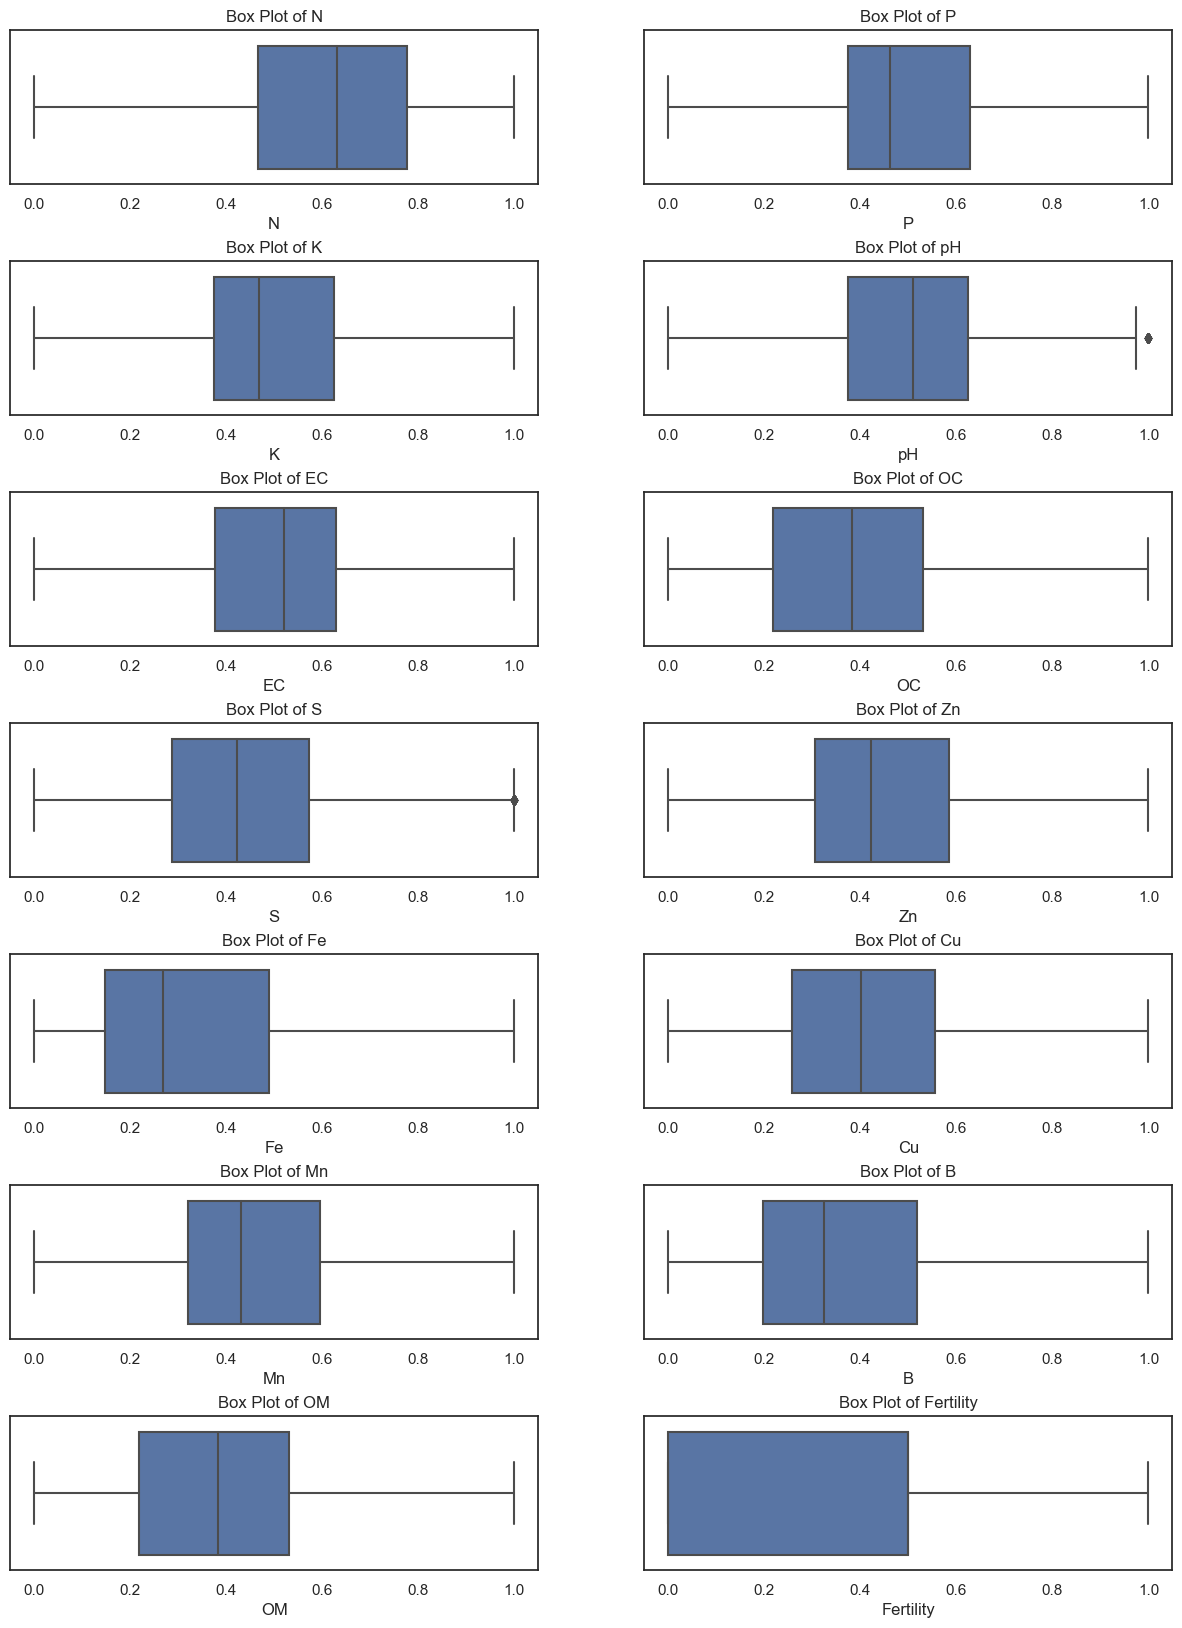

In [145]:
attributes = df_norm_min_max.columns
fig, axes = plt.subplots(7, 2, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing

for i, attribute in enumerate(attributes):
    row, col = divmod(i, 2)
    box_plot_sns(df_norm_min_max, attribute, axes[row, col])

plt.show()

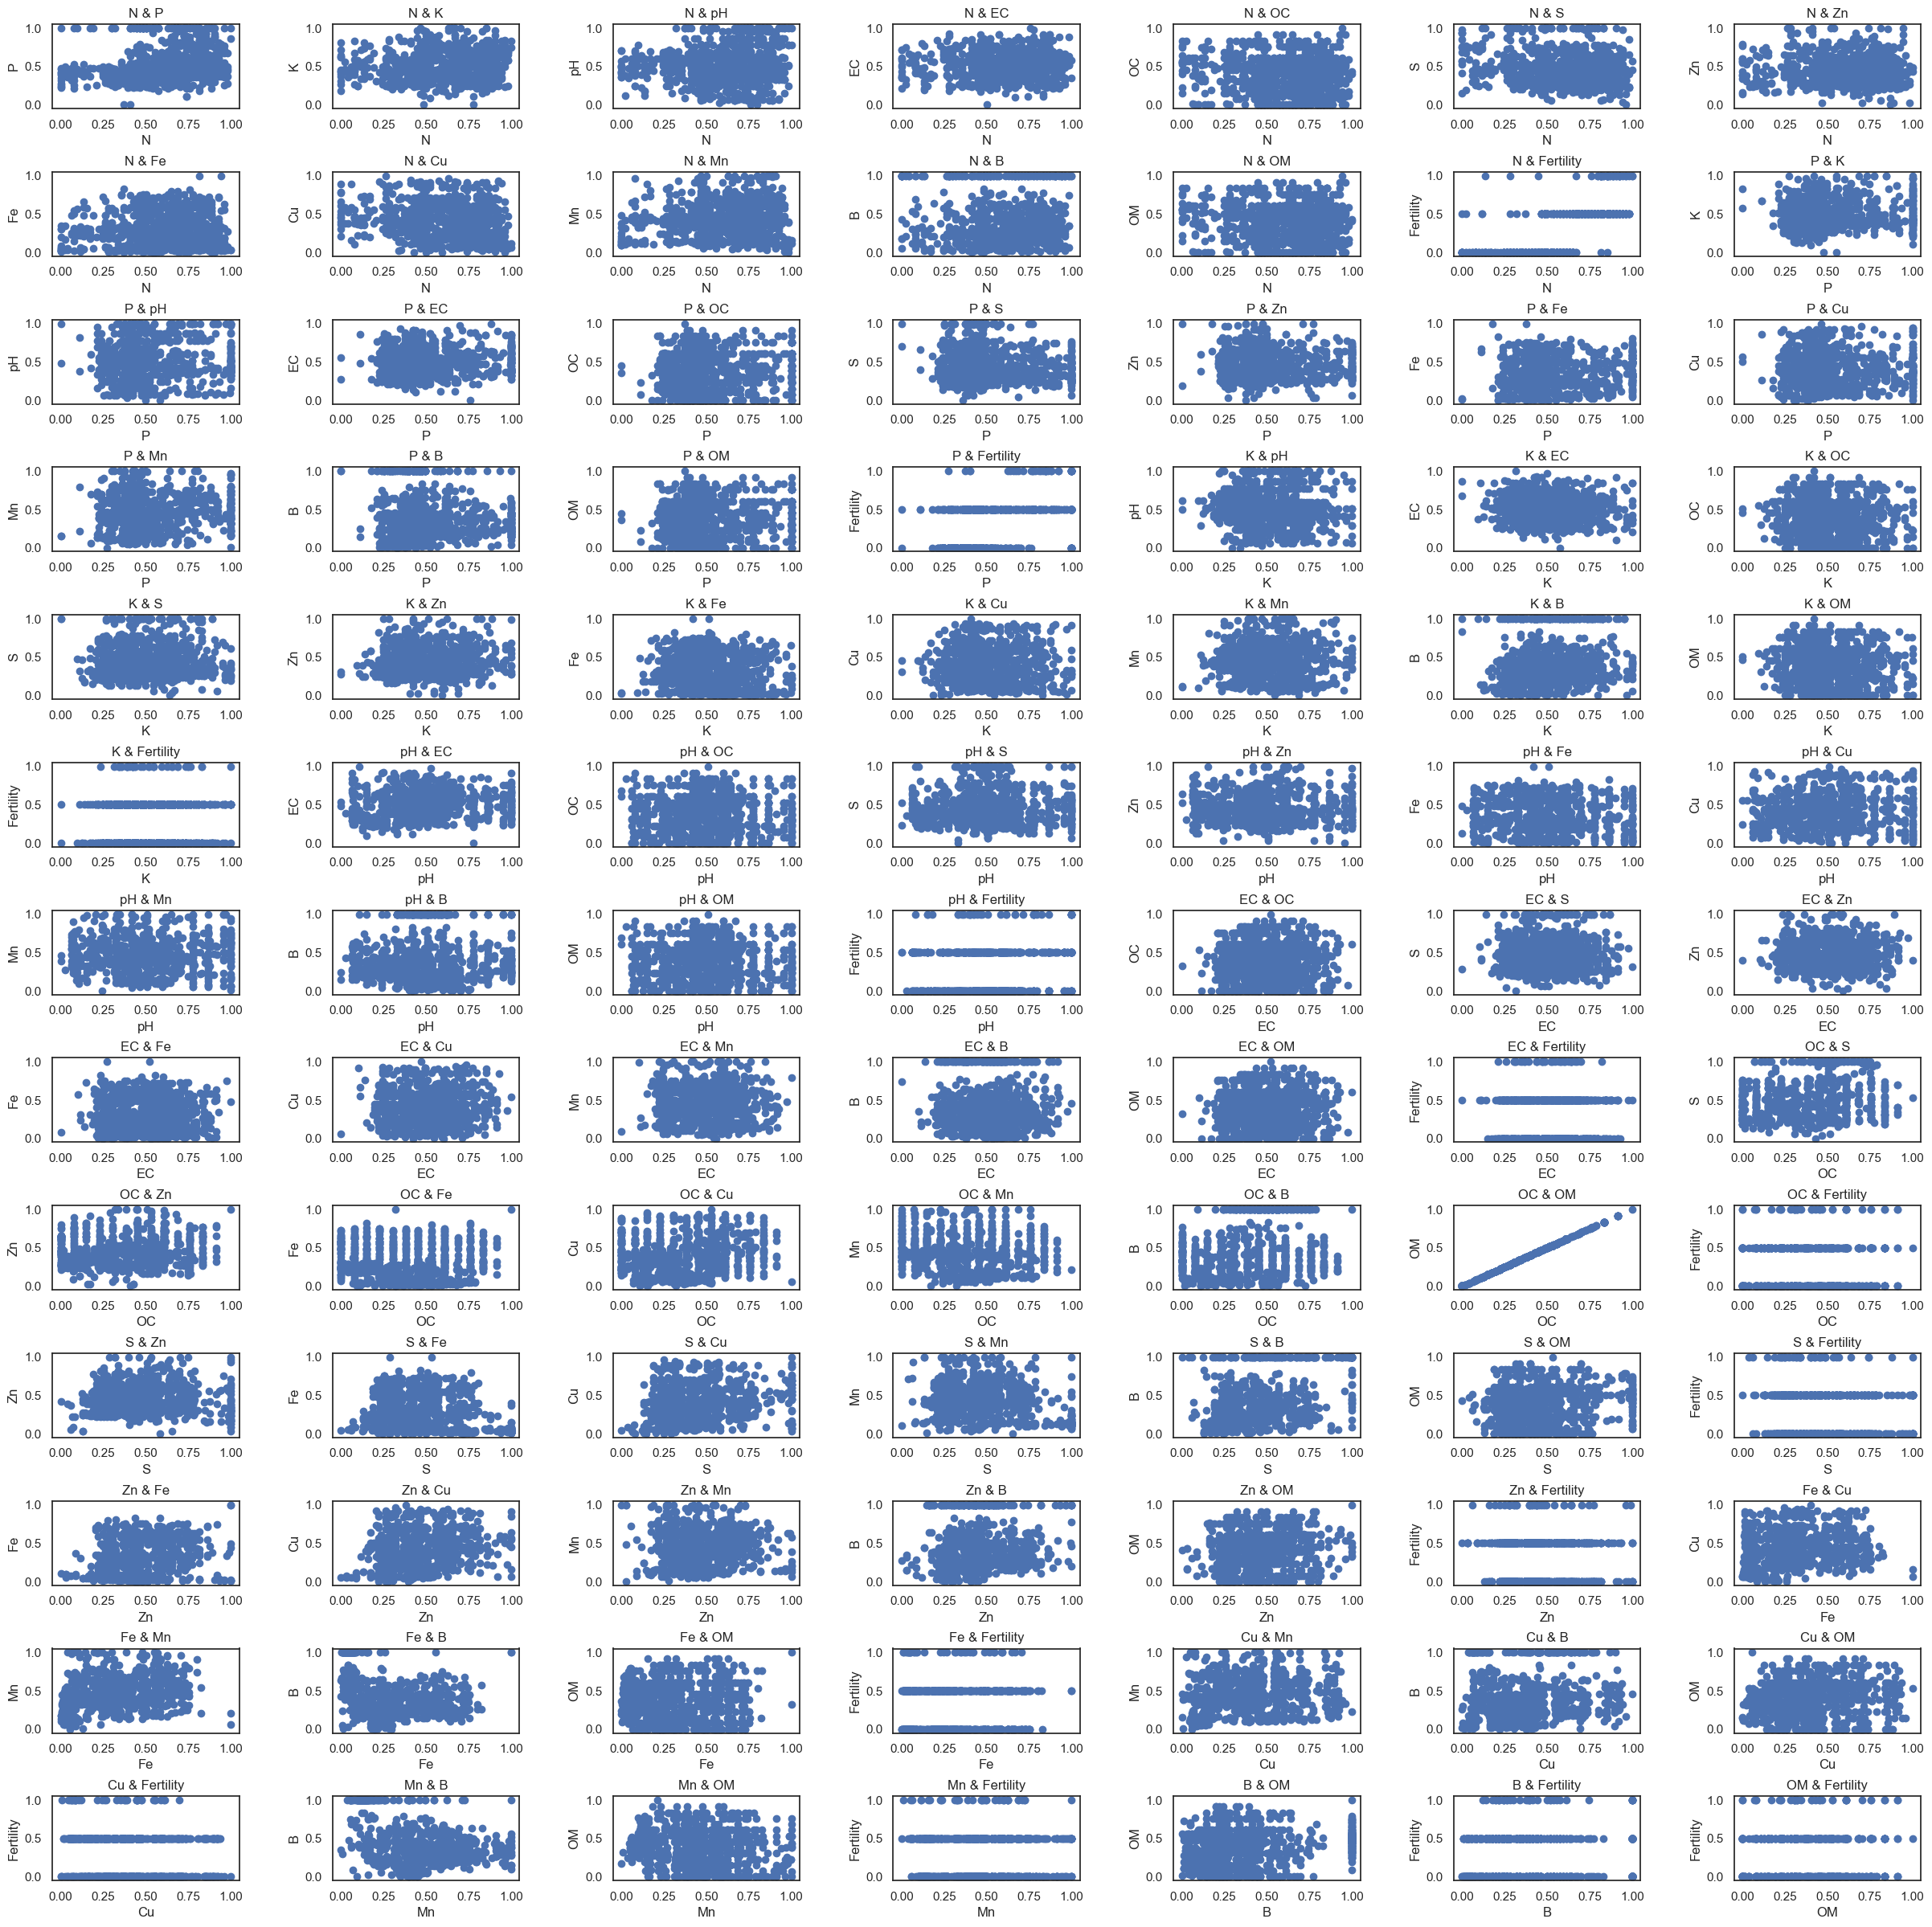

In [146]:

fig, axes = plt.subplots(13, 7, figsize=(30, 30))  # 7x7 grid for 14 attributes
fig.subplots_adjust(hspace=0.75, wspace=0.5) # Adjust vertical spacing

combinations = list(itertools.combinations(df_norm_min_max.columns, 2))  # Generate all combinations of 2 columns

k = 0
j = 0

for combination in combinations:
    axes[k, j].scatter(df_norm_min_max[combination[0]], df_norm_min_max[combination[1]])
    axes[k, j].set_xlabel(combination[0])
    axes[k, j].set_ylabel(combination[1])
    axes[k, j].set_title(f"{combination[0]} & {combination[1]}")

    j += 1
    if j == 7:
        j = 0
        k += 1

plt.show()

## Done